In [14]:
from triaction.model import *
from triaction.computation import *
from triaction.results import *
import triaction.infocore_modified as ifc
from triaction.analysis_modified import visualisation_conditioned,decision_tree
import matplotlib.pyplot as plt
from sklearn import metrics
import re
import pandas as pd
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout

# Figure 3

In [15]:
#Initialising the network
n_nodes = 10
edge_list = [[1,2],[1, 4],[1,6],[3,6],[3,8],[3,10],[4,9],[5,7],[5,8],[6,7],[8,9],[9,10]]
n_edges = len(edge_list)
B = create_node_edge_incidence_matrix(edge_list)
K = np.array([[0, 0, 0, 0, 0,0,0,0,0,0],[0,0,-1,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,1,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,1,0,0,0],[0,0,0,-1,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,0,0,0],[0,0,0,0,0,0,0,1,0,0]])

#Initialising and running the model
model = NDwTIs(
    B=B, K=K, w_pos=8, w_neg=0.5,
    threshold=1e-3, alpha=0.05, noise_std=1*(1e-2),
    x_init=np.zeros(n_nodes), dt=1e-2, t_max=4000.)
timeseries = model.run()
timeseries = np.array(timeseries)
timeseries = timeseries[:,-200000::5]

#TRIM algorithm for triple 4,9,5
tlen = 40000
num = round(tlen/100)
nrunmax = 2
I=[4,9,5]
MI, MIz, MIz_null, MIC, Theta_S, Theta2_T, Theta2_Tn, Sigma, Sigma_null_list, P, P_T, P_Tn = ifc.Theta_score_null_model(timeseries, I, num, tlen, nrunmax, False, True)
x = np.arange(1, num+1)

Sigma, T, Tn 0.33817219309620605 1.2762100562955947 0.484867502897913
Sigma_mean_null 0.11021789946077973
T_mean_null 0.6438902426490576
Tn_mean_null 0.4701300569326057
P 0.5 P_T 0.5 P_Tn 0.5
Theta 74.24654542085761 Theta_T 36.661485454394686 Theta_Tn 2.2870092006972778


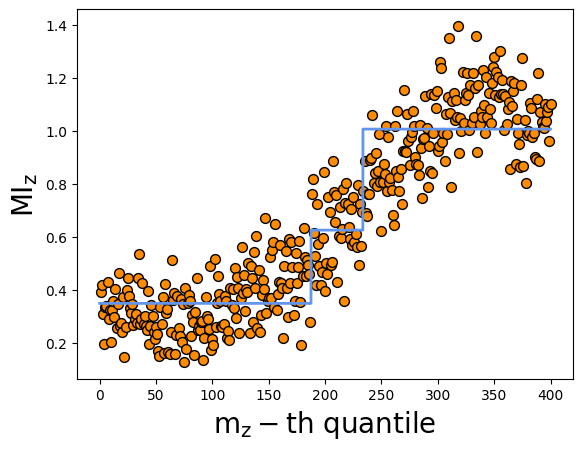

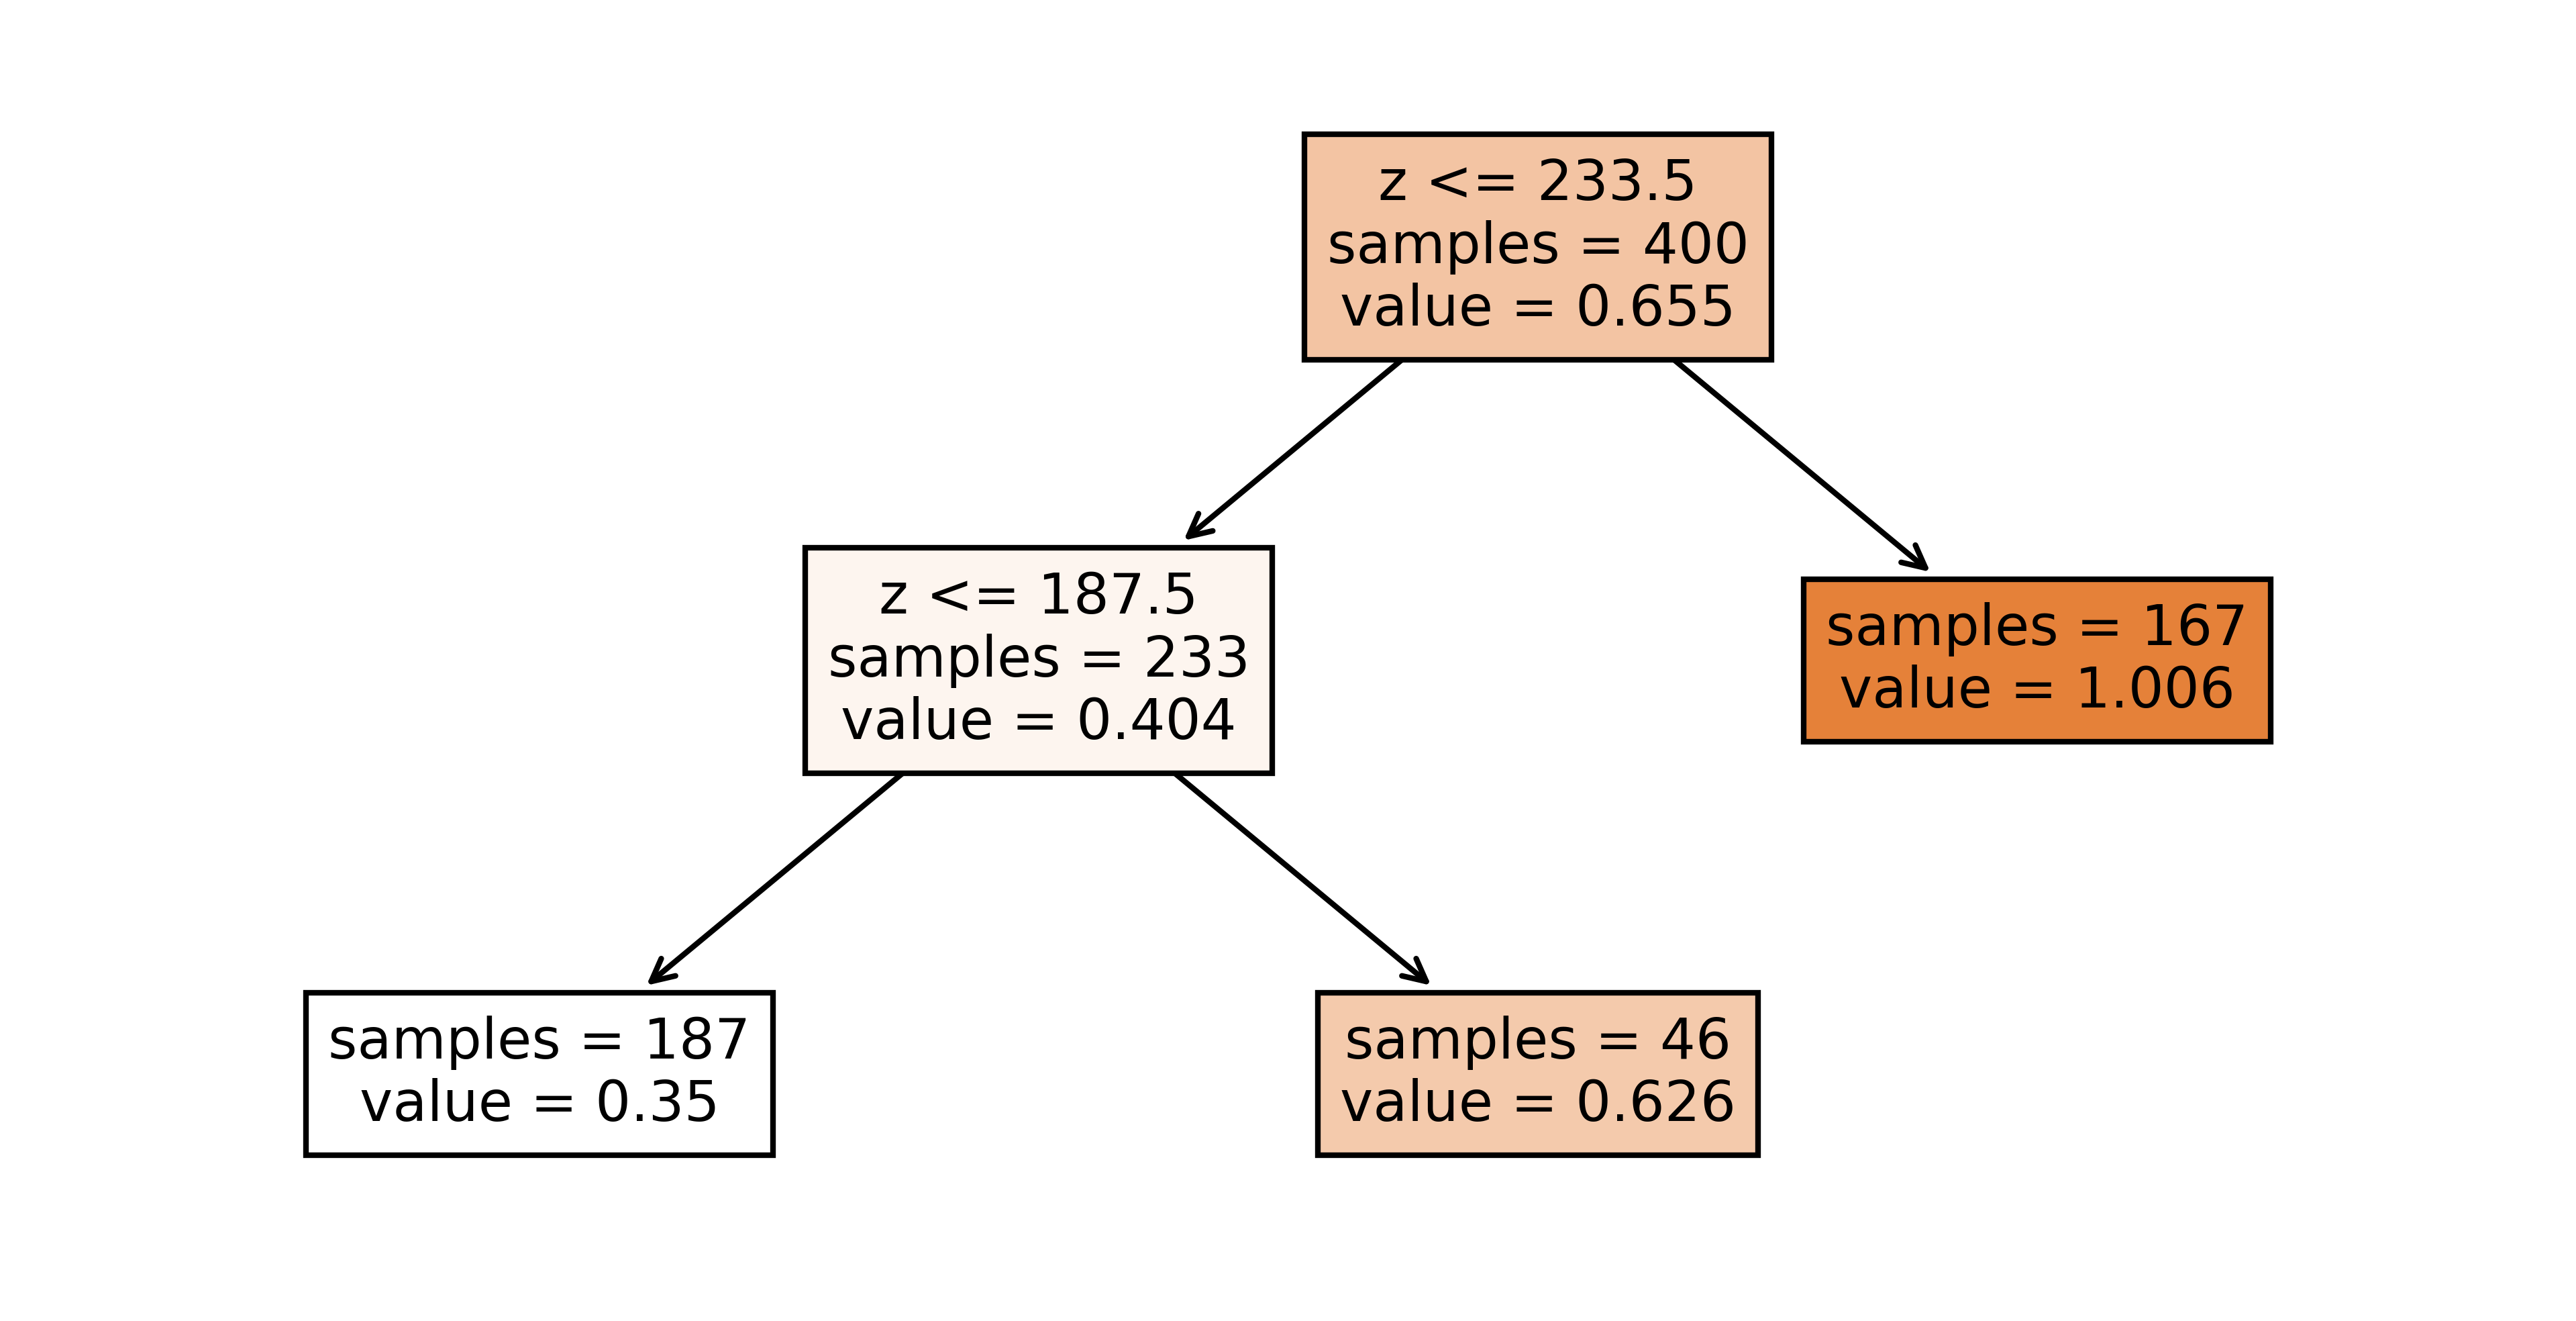

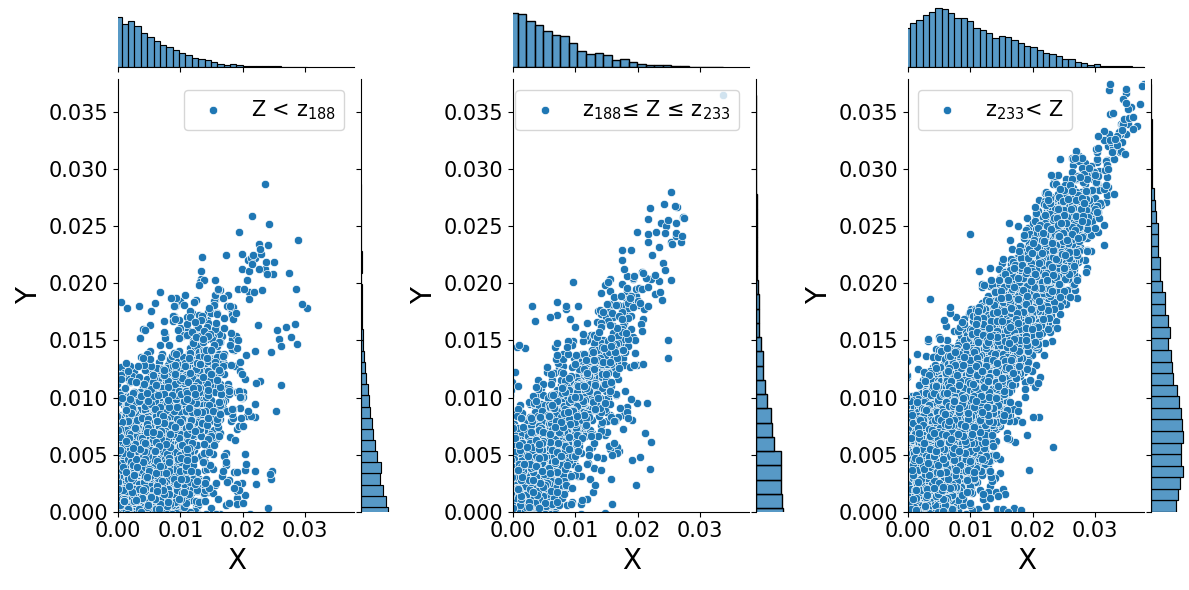

In [3]:
#Producing the figures
th1,th2,c = decision_tree(x, MIz, disp_fig=True, disp_txt_rep=True,
              disp_tree=True)
I = np.array(I)-1
visualisation_conditioned(timeseries, I, num, tlen, cond = [th1,th2])

# Figure 4 

In [12]:
#Processing and formatting the results of the analysis of the small (N=10) network

edges = edge_processing(['EdgeC/edgeC12.txt','EdgeC/edgeC14.txt','EdgeC/edgeC16.txt','EdgeC/edgeC36.txt',
                         'EdgeC/edgeC38.txt','EdgeC/edgeC310.txt','EdgeC/edgeC49.txt','EdgeC/edgeC57.txt',
                         'EdgeC/edgeC58.txt','EdgeC/edgeC67.txt','EdgeC/edgeC89.txt','EdgeC/edgeC910.txt'])

edges2 = edge_processing(['EdgeT/edgeT12.txt','EdgeT/edgeT14.txt','EdgeT/edgeT16.txt','EdgeT/edgeT36.txt',
                         'EdgeT/edgeT38.txt','EdgeT/edgeT310.txt','EdgeT/edgeT49.txt','EdgeT/edgeT57.txt',
                         'EdgeT/edgeT58.txt','EdgeT/edgeT67.txt','EdgeT/edgeT89.txt','EdgeT/edgeT910.txt'])

edges3 = edge_processing(['EdgeA/edgeA12.txt','EdgeA/edgeA14.txt','EdgeA/edgeA16.txt','EdgeA/edgeA36.txt',
                         'EdgeA/edgeA38.txt','EdgeA/edgeA310.txt','EdgeA/edgeA49.txt','EdgeA/edgeA57.txt',
                         'EdgeA/edgeA58.txt','EdgeA/edgeA67.txt','EdgeA/edgeA89.txt','EdgeA/edgeA910.txt'])

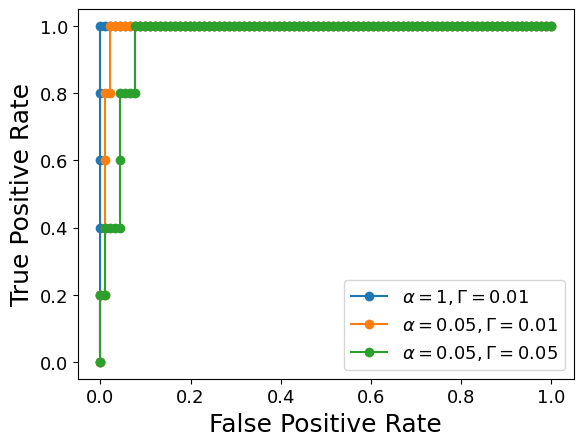

In [13]:
#Plotting the ROC curve
y = np.array([0,0,0,0,0,0,0,0,
              0,0,1,0,0,0,0,0,
              0,0,0,0,0,0,0,0,
              0,0,0,0,0,0,1,0,
              0,0,0,0,0,0,0,0,
              0,0,0,0,0,0,0,0,
              0,0,0,0,0,0,1,0,
              0,0,0,0,1,0,0,0,
              0,0,0,0,0,0,0,0,
              0,0,0,0,0,0,0,0,
              0,0,0,0,0,0,0,0,
              0,0,0,0,0,0,0,1])
scores2 = np.ndarray.flatten(edges2[:,:,1])
scores3 = np.ndarray.flatten(edges3[:,:,1])
scores4 = np.ndarray.flatten(edges[:,:,1])
fpr2, tpr2, thresholds = metrics.roc_curve(y, scores2,drop_intermediate=False)
fpr3, tpr3, thresholds = metrics.roc_curve(y, scores3,drop_intermediate=False)
fpr4, tpr4, thresholds = metrics.roc_curve(y, scores4,drop_intermediate=False)
plt.plot(fpr2,tpr2,'o-',label=r'$\alpha = 1, \Gamma = 0.01$')
plt.plot(fpr3,tpr3,'o-',label=r'$\alpha = 0.05, \Gamma = 0.01$')
plt.plot(fpr4,tpr4,'o-',label=r'$\alpha = 0.05, \Gamma = 0.05$')
plt.legend(fontsize=13)
plt.ylabel('True Positive Rate',fontsize=18)
plt.xlabel('False Positive Rate',fontsize=18)
plt.rc('xtick',labelsize=13)
plt.rc('ytick',labelsize=13)

# Figure 5

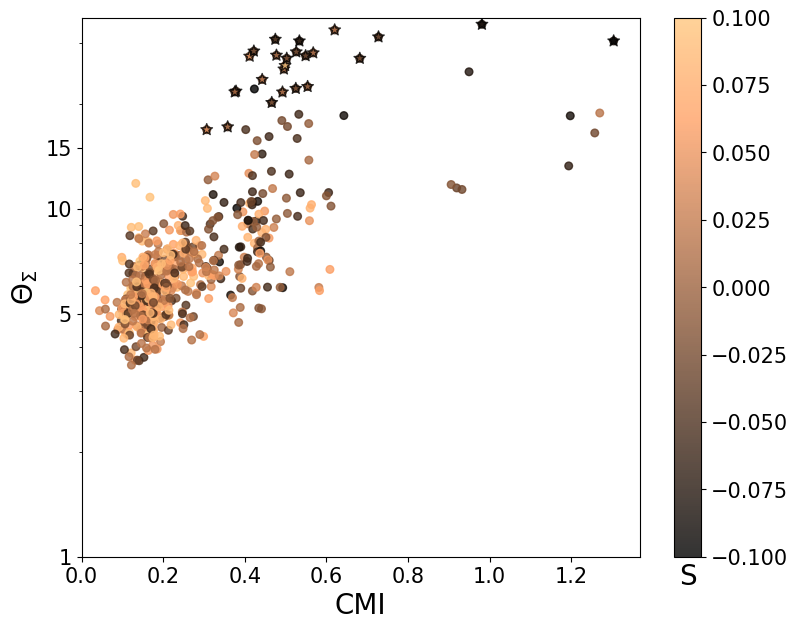

In [7]:
synth_100_test_ran = pd.read_csv('synth_100_all_ran.csv')
ind = synth_100_test_ran['P']==0.001
synth_100_test_gau = pd.read_csv('synth_100_all_gau.csv')
synth_100_test_cr = synth_100_test_gau[ind][synth_100_test_gau[ind]['P']>0.0005]
synth_100_test_ran = pd.read_csv('synth_100_test_ran_S.csv')
synth_100_test_pd = pd.read_csv('synth_100_test_pd_S.csv')
S = pd.DataFrame(data=[], columns=['S'])
synth_100_test_cr_S = pd.concat([synth_100_test_cr,S], axis = 1)
MI_MIC_merge(synth_100_test_ran,synth_100_test_pd,synth_100_test_cr_S, key = 'S', display = 2.5, label = None)

# Figure 6

/var/folders/5f/66hpgr7n2y13tw1y000j2p5r0000gn/T/ipykernel_36328/1117192761.py:19: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(T, prog="fdp")


Graph:


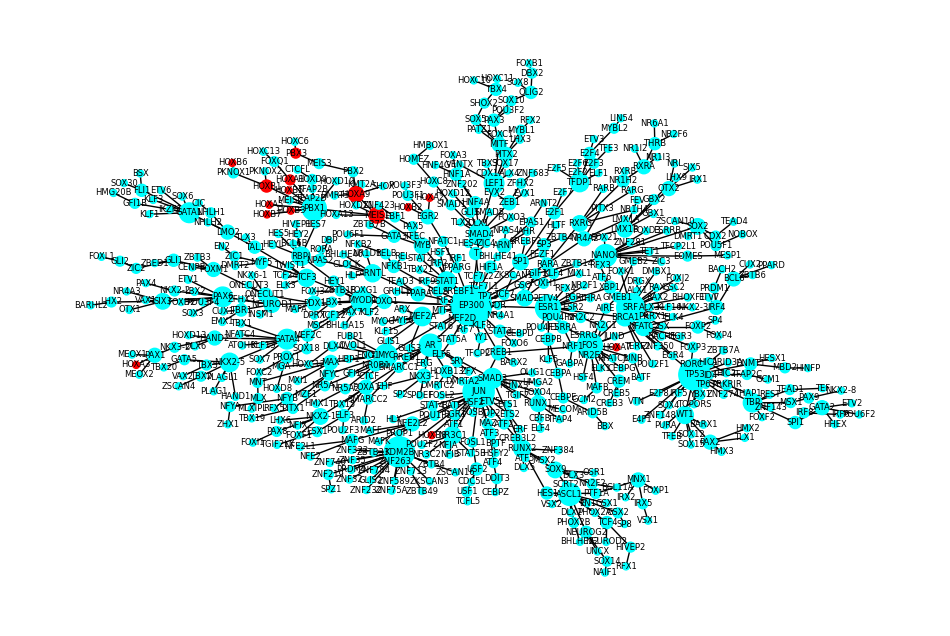

In [8]:
#Constructing the Maximal Spanning Tree from the PPI Edge Data
ppi = pd.read_csv('data/reduce_ppi.tsv', sep = '\t')
graph_ppi = nx.from_pandas_edgelist(ppi, source = '0', target = '1',edge_attr='2')
T = nx.maximum_spanning_tree(graph_ppi,weight = '2')
L = ['HOXA1','HOXA2','HOXA3','HOXA4','HOXA5','HOXA6','HOXA7','HOXA8','HOXA9','HOXB1','HOXB2','HOXB3','HOXB4','HOXB5','HOXB6','HOXB7','HOXB8','HOXB9','PBX3','MEIS1']
fig = plt.figure(figsize=(12,8))
Gcc = sorted(nx.connected_components(T), key=len, reverse=True)
G0 = T.subgraph(Gcc[0])
f = nx.Graph()
fedges = filter(lambda x: G0.degree()[x[0]] > 0 and G0.degree()[x[1]] > 0, G0.edges())
f.add_edges_from(fedges)
color_map=[]
NodeSize = []
for n in f.nodes:
    NodeSize.append(G0.degree(n)*25)
    if n in L:
        color_map.append('red')
    else:
        color_map.append('cyan')
pos = graphviz_layout(T, prog="fdp")
nx.draw(f,node_size=NodeSize,pos=pos,ax=fig.add_subplot(),node_color=color_map)
nx.draw_networkx_labels(f,pos=pos,font_size=6)
print('Graph:')

# Figure 7

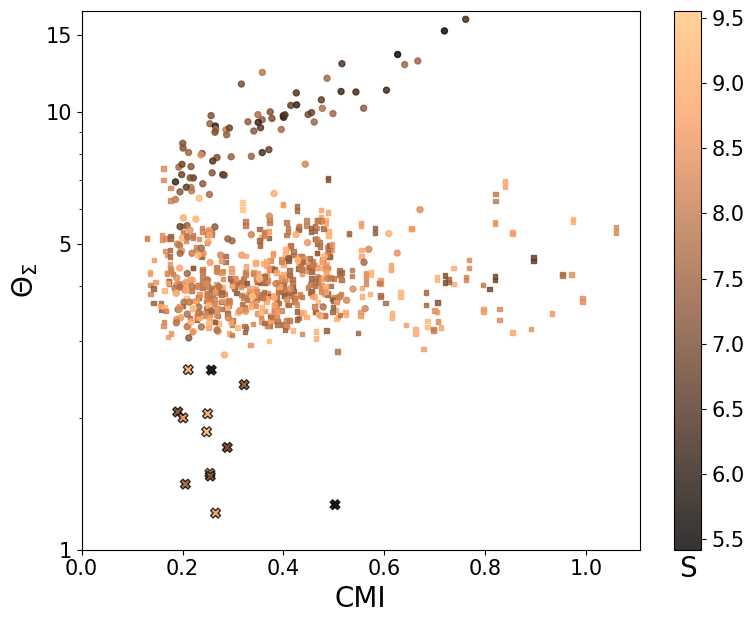

In [9]:
Bio_Results_S = pd.read_csv('Results_S.csv')
Sig_Trip_S = pd.read_csv('Sig_Trip_S.csv')
ST_gau_S = pd.read_csv('ST_gau_S.csv')
MI_MIC_merge(Bio_Results_S, Sig_Trip_S, ST_gau_S, key = 'S', display = 3, label = None)

In [10]:
gene_expression = pd.read_csv('data/reduce_gene_expression.tsv', sep = '\t', index_col=0)

Sigma, T, Tn 0.3846935279042448 0.9251806630931907 0.6393281170241394
Sigma_mean_null 0.12673564182681848
T_mean_null 0.34532309345973
Tn_mean_null 0.2940605858797902
P 0.01 P_T 0.01 P_Tn 0.01
Theta 6.177299608714593 Theta_T 5.129598680684369 Theta_Tn 3.270152988589834


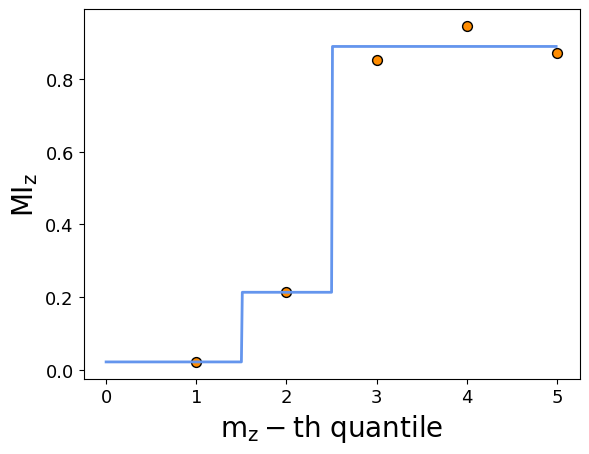

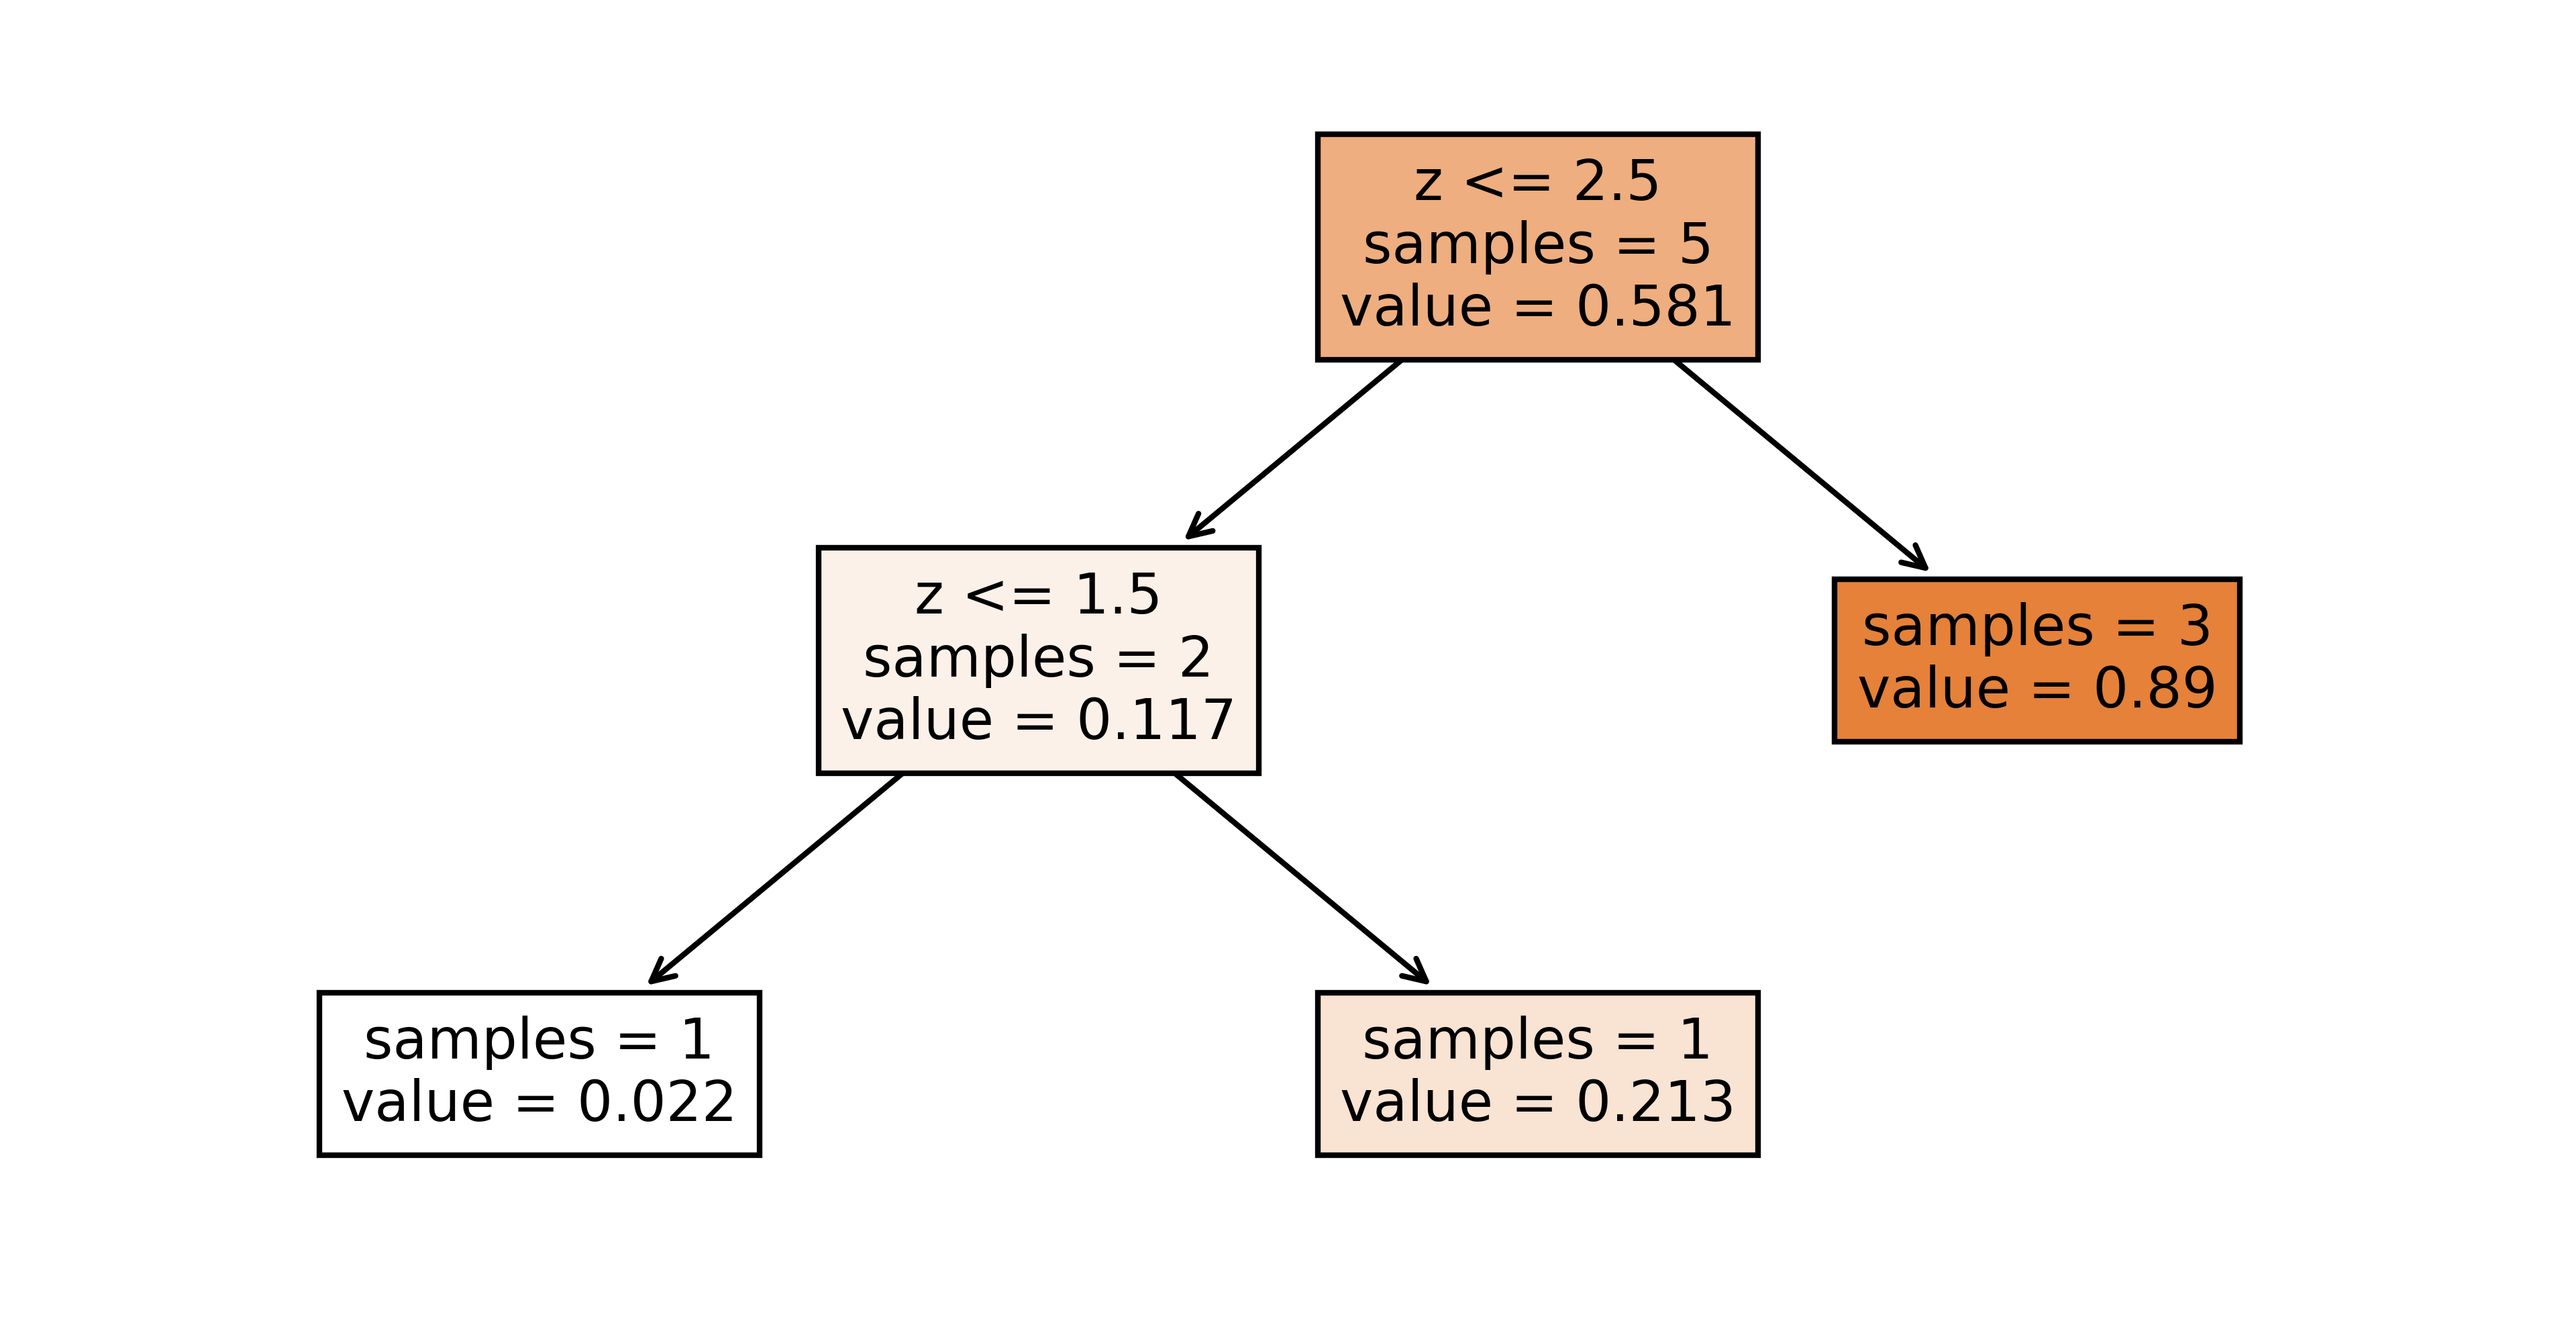

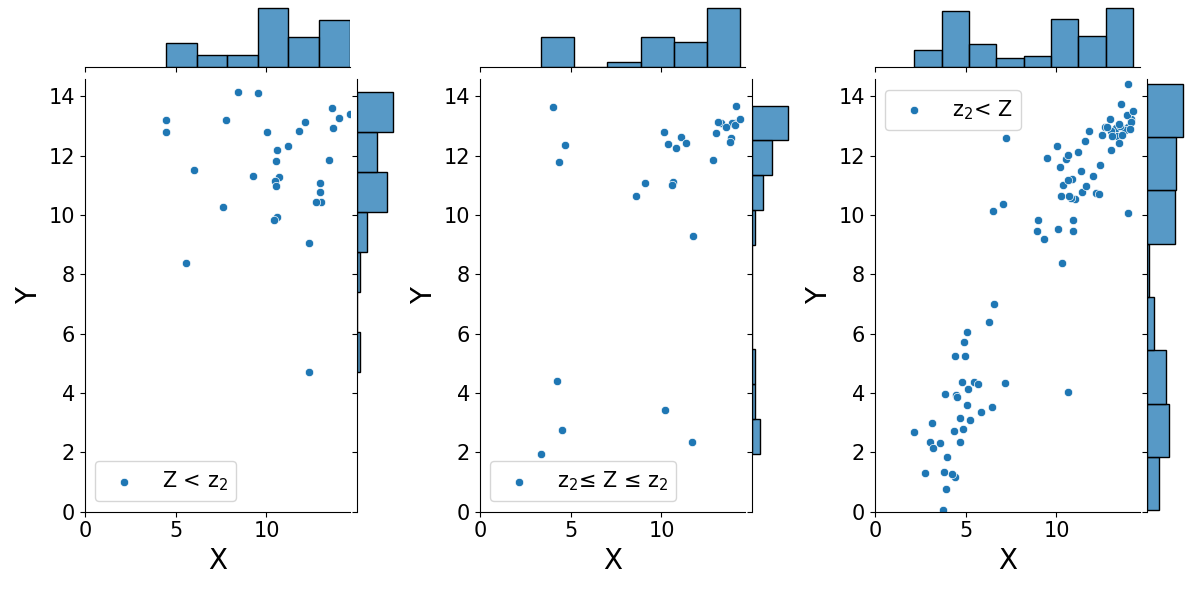

In [11]:
#getting Timeseries data for genes
name_X = 'HOXB3'
name_Y = 'MEIS1'
name_Z = 'GLIS3'

X = np.array(gene_expression.T[name_X])
Y = np.array(gene_expression.T[name_Y])
Z = np.array(gene_expression.T[name_Z])
timeseries = np.zeros((3,len(X)))
timeseries[0,:] = X
timeseries[1,:] = Y
timeseries[2,:] = Z
I = [1,2,3]
num = 5
tlen = len(X)
nrunmax = 100
MI, MIz, MIz_null, MIC, Theta_S, Theta2_T, Theta2_Tn, Sigma, Sigma_null_list, P, P_T, P_Tn = ifc.Theta_score_null_model(timeseries, I, num, tlen, nrunmax, True, True)

x = range(1, num+1)
th1, th2, c = decision_tree(x, MIz, disp_fig=True, disp_txt_rep=True,
              disp_tree=True, name = 'd_tree_bio')
I = [0,1,2]
visualisation_conditioned(timeseries, I, num, tlen, cond = [th1,th2])

Sigma, T, Tn 0.4407285194367151 1.0260321296350707 0.9351831637861043
Sigma_mean_null 0.13979367300666473
T_mean_null 0.3858888153263208
Tn_mean_null 0.32874704429994006
P 0.0001 P_T 0.0001 P_Tn 0.0003
Theta 5.943658410897534 Theta_T 4.474265251924143 Theta_Tn 4.459797733258061


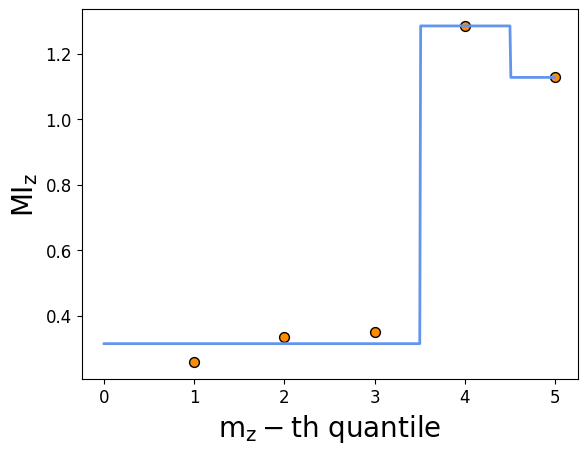

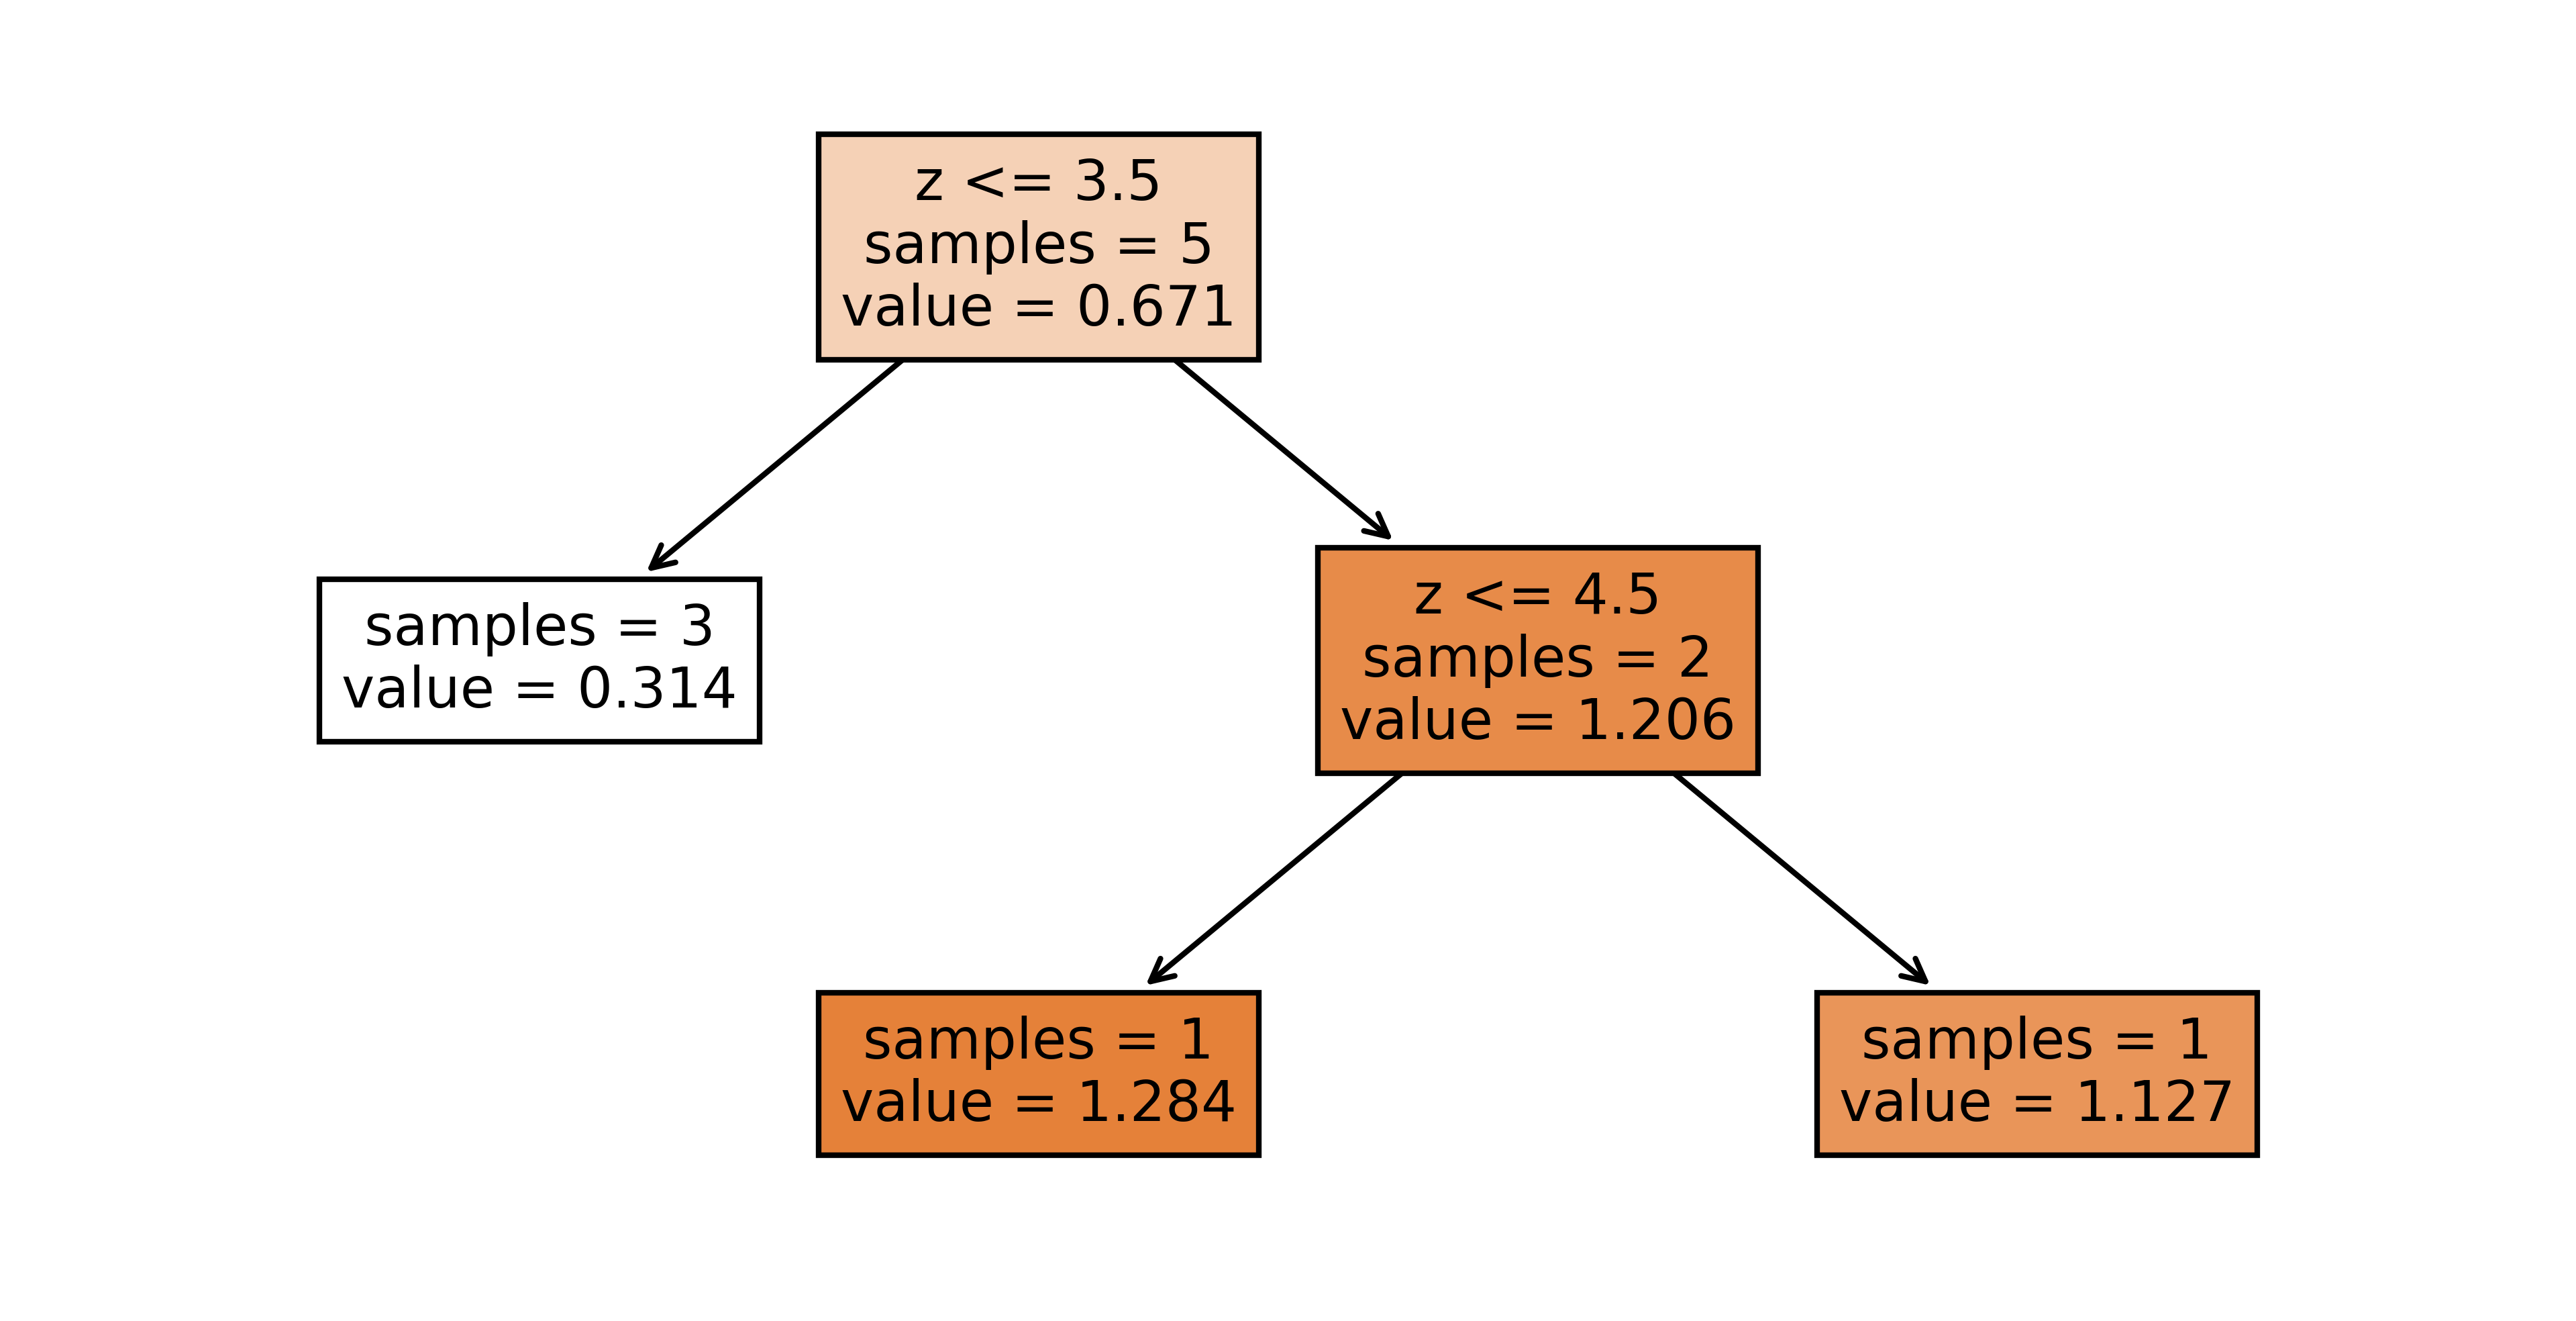

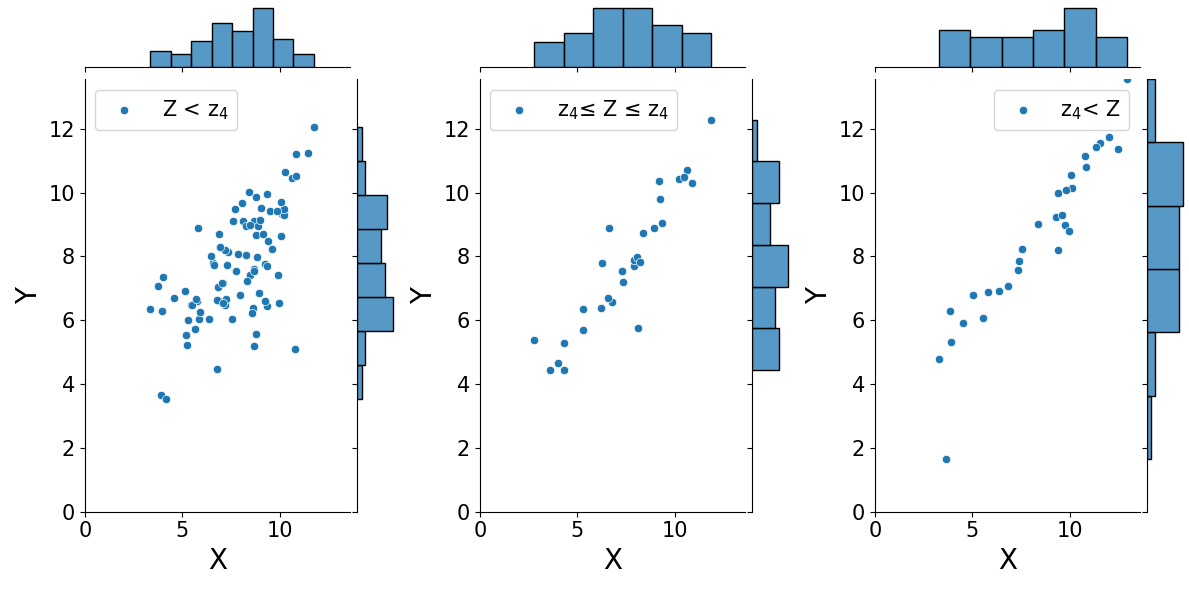

In [12]:
name_X = 'GATA1'
name_Y = 'KLF1'
name_Z = 'ETV1'

X = np.array(gene_expression.T[name_X])
Y = np.array(gene_expression.T[name_Y])
Z = np.array(gene_expression.T[name_Z])
timeseries = np.zeros((3,len(X)))
timeseries[0,:] = X
timeseries[1,:] = Y
timeseries[2,:] = Z
I = [1,2,3]
num = 5
tlen = len(X)
nrunmax = 10000
MI, MIz, MIz_null, MIC, Theta_S, Theta2_T, Theta2_Tn, Sigma, Sigma_null_list, P, P_T, P_Tn = ifc.Theta_score_null_model(timeseries, I, num, tlen, nrunmax, True, True)

x = range(1, num+1)
th1, th2, c = decision_tree(x, MIz, disp_fig=True, disp_txt_rep=True,
              disp_tree=True)
I = [0,1,2]
visualisation_conditioned(timeseries, I, num, tlen, cond = [th1,th2])